In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from nltk.corpus import stopwords
from nltk.cluster import KMeansClusterer,cosine_distance,euclidean_distance
from sklearn import metrics
from sklearn import mixture
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import nltk
import re
import random
import emoji
nltk.download ('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kelvin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
Labeled_tweet = pd.read_csv("C:/Users/Kelvin/Desktop/Assignment/2022Spring/BIA660/Tweet.csv")
Labeled_tweet

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 128833: invalid start byte

In [84]:
tweet = Labeled_tweet[['is_misinfo','text content']]
tweet

is_misinfo                                       text content
0               0  if you kissed someone on Amelia St, don’t worr...
1               0  i really doubt 2021 will be much different imo...
2               0  People want answers, but they’re also just exc...
3               1  Why any healthy person would want to take an e...
4               0  I’m most excited for new President &amp; new v...
...           ...                                                ...
12746           1  Go ahead, take it...#Vaccine #TheJab #Genocide...
12747           0  Going to my first vaccine today. Very very ner...
12748           0  Media: "The #Japanese government declared a ne...
12749           0  Getting my first dose vaccine tomorrow. HUKM d...
12750           0  I’m so happy that my mom got her first dose va...

[12751 rows x 2 columns]

In [85]:
for i in range(len(tweet)):
    tweet.iloc[i,1] = re.sub(r'\d+', '', tweet.iloc[i,1])
    tweet.iloc[i,1] = tweet.iloc[i,1].strip()
    R = re.compile(r'[http|https]*://[a-zA-Z0-9.?/&=:]*',re.S)
    tweet.iloc[i,1] = re.sub(R, '', tweet.iloc[i,1])

C:\Users\Kelvin\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [86]:
tweet.iloc[0,1]

'if you kissed someone on Amelia St, don’t worry about what’s in the vaccine.'

In [28]:
tfidf_vect = TfidfVectorizer(min_df=1,  stop_words='english' )

# LDA can only use raw term counts for LDA 
tf = tfidf_vect.fit_transform(tweet)
X_train, X_test = train_test_split(\
                tf, test_size=0.3, random_state=1)


  (0, 1)	1.0


In [69]:
# tweet = np.array(tweet)
# random.shuffle(tweet)
# tweet

array([[0,
        'if you kissed someone on Amelia St, don’t worry about what’s in the vaccine.'],
       [0,
        'if you kissed someone on Amelia St, don’t worry about what’s in the vaccine.'],
       [0,
        'i really doubt  will be much different imo because corona will probably ruin it, so i’m not too excited but hop… '],
       ...,
       [1,
        'Watching people inject themselves with a completely unproven vaccine makes me cringe. Who knows what that shit will… '],
       [0,
        'One dose down, one to go! Thank you so much to Mark the doctor who gave me the jab and thank you to all the @NHS st… '],
       [0,
        'Got my first shot of the @pfizer #COVID  vaccine today. One down, one to go. ']],
      dtype=object)

In [87]:
# all_content = [d[0] for d in tweet]
# df1 = tweet[:int(0.7*len(all_content))]
# df1 = pd.DataFrame(df1,columns = ['label','content'])
# df1.to_csv("C:/Users/Kelvin/Desktop/Assignment/2022Spring/BIA660/Tweet_train.csv",index = False)
# df2 = tweet[int(0.7*len(all_content)):]
# df2 = pd.DataFrame(df2,columns = ['label','content'])
# df2.to_csv("C:/Users/Kelvin/Desktop/Assignment/2022Spring/BIA660/Tweet_test.csv",index = False)
df_train, df_test = train_test_split(tweet,test_size = 0.2)
df_train.to_csv("C:/Users/Kelvin/Desktop/Assignment/2022Spring/BIA660/Tweet_train.csv",index = False)
df_test.to_csv("C:/Users/Kelvin/Desktop/Assignment/2022Spring/BIA660/Tweet_test.csv",index = False)

In [45]:
train = pd.read_csv("C:/Users/Kelvin/Desktop/Assignment/2022Spring/BIA660/Tweet_train.csv")


test = pd.read_csv("C:/Users/Kelvin/Desktop/Assignment/2022Spring/BIA660/Tweet_test.csv")



In [46]:
for i in range(len(train)):
    train.iloc[i,1] = re.sub(r'\d+', '', train.iloc[i,1])
    train.iloc[i,1] = train.iloc[i,1].strip()
    R = re.compile(r'[http|https]*://[a-zA-Z0-9.?/&=:]*',re.S)
    train.iloc[i,1] = re.sub(R, '', train.iloc[i,1])
for i in range(len(test)):
    test.iloc[i,1] = re.sub(r'\d+', '', test.iloc[i,1])
    test.iloc[i,1] = test.iloc[i,1].strip()
    R = re.compile(r'[http|https]*://[a-zA-Z0-9.?/&=:]*',re.S)
    test.iloc[i,1] = re.sub(R, '', test.iloc[i,1])    

In [47]:

print (test)
train

      is_misinfo                                       text content
0              0  I've spent most of the day trying to get sched...
1              0  Not my mom saying we’re getting the coronaviru...
2              1  #Michigan Gov. Gretchen Whitmer Ties Freedom t...
3              1  Using Herd Immunity Excuse for Gene Therapy Va...
4              1  Context.\n"Many Dying in Israel Following the ...
...          ...                                                ...
2546           0                     yay mak getting vaccine todayy
2547           0  I had the incredible privilege of receiving th...
2548           0  Got my first dose of vaccine   \n#vaccinated #...
2549           1  We still have no long term evidence of impact ...
2550           0  gonna get my first jab of the vaccine on satur...

[2551 rows x 2 columns]


is_misinfo                                       text content
0               0  uhg time to get my second vaccine i hope i don...
1               1  New censorship! Twitter says it may be mislead...
2               1  If you’ve had a COVID- vaccine, it’s thanks in...
3               0  Got my second vaccine. Can't wait to still wea...
4               0  Post-second vaccine symptoms description: like...
...           ...                                                ...
10195           0  I’m getting my first round of the COVID vaccin...
10196           0  "We are an elite club. We do not wish to be, b...
10197           1  Why do they keep calling it a vaccine? Its an ...
10198           1  Many dying in Israel following the experimenta...
10199           0  Had my #vaccine   even got a sticker. Very wel...

[10200 rows x 2 columns]

In [23]:
def remove_emoji(text, replace=" "):
    return re.sub(emoji.get_emoji_regexp(), replace, text)
for i in range(len(train)):
    text = train.iloc[i,1]
    res = remove_emoji(text, " ")
    train.iloc[i,1] = res
for i in range(len(test)):
    text = test.iloc[i,1]
    res = remove_emoji(text, " ")
    test.iloc[i,1] = res
#     train.iloc[i,1] = emoji.emojize(result)

C:\Users\Kelvin\AppData\Local\Temp/ipykernel_7940/179067595.py:2: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  return re.sub(emoji.get_emoji_regexp(), replace, text)


In [25]:
train.to_csv("C:/Users/Kelvin/Desktop/Assignment/2022Spring/BIA660/Tweet_train.csv",index = False)
test.to_csv("C:/Users/Kelvin/Desktop/Assignment/2022Spring/BIA660/Tweet_test.csv",index = False)

In [181]:
train_text = train["text content"]
test_label = test["is_misinfo"]
test_text = test["text content"]
print (train)
print (test)

       is_misinfo                                       text content
0               0  uhg time to get my second vaccine i hope i don...
1               1  New censorship! Twitter says it may be mislead...
2               1  If you’ve had a COVID- vaccine, it’s thanks in...
3               0  Got my second vaccine. Can't wait to still wea...
4               0  Post-second vaccine symptoms description: like...
...           ...                                                ...
10195           0  I’m getting my first round of the COVID vaccin...
10196           0  "We are an elite club. We do not wish to be, b...
10197           1  Why do they keep calling it a vaccine? Its an ...
10198           1  Many dying in Israel following the experimenta...
10199           0  Had my #vaccine   even got a sticker. Very wel...

[10200 rows x 2 columns]
      is_misinfo                                       text content
0              0  I've spent most of the day trying to get sched...
1         

In [116]:
def cluster_kmean(train_text, test_text, test_label):
    
    tfidf_vect = TfidfVectorizer(min_df=4,  stop_words='english' ,max_df = 1.0)
    dtm = tfidf_vect.fit_transform(train_text)
    num_clusters = 3
    clusterer = KMeansClusterer(num_clusters, cosine_distance, repeats=20)
    clusters = clusterer.cluster(dtm.toarray(), assign_clusters=True)
    test_dtm = tfidf_vect.transform(test_text)
    predicted = [clusterer.classify(v) for v in test_dtm.toarray()]
    confusion_df = pd.DataFrame(list(zip(test_label, predicted)), columns = ["label", "cluster"])
    df = pd.crosstab( index=confusion_df.cluster, columns=confusion_df.label)
    labels = dict(df.idxmax(axis = 1))
    predicted_target = [labels[i]  for i in predicted]
    print("Cosine Distance:\n ",metrics.classification_report(test_label.values, predicted_target))
    centroids=np.array(clusterer.means())
    sorted_centroids = centroids.argsort()[:, ::-1] 
    voc_lookup= tfidf_vect.get_feature_names()

    for i in range(num_clusters):
    
    # get words with top 20 tf-idf weight in the centroid
      top_words=[voc_lookup[word_index] \
               for word_index in sorted_centroids[i, :20]]
      print("Cluster %d:\n %s " % (i, "; ".join(top_words)))

In [117]:
cluster_kmean(train_text, test_text, test_label)

Cosine Distance:
                precision    recall  f1-score   support

           0       0.94      0.78      0.85      1627
           1       0.70      0.92      0.80       924

    accuracy                           0.83      2551
   macro avg       0.82      0.85      0.82      2551
weighted avg       0.86      0.83      0.83      2551

Cluster 0:
 worry; don; vaccine; need; ve; dont; whats; eat; covid; eaten; ate; used; drink; like; drank; bathroom; claire; pierced; water; people 
Cluster 1:
 got; vaccine; dose; just; today; second; covid; shot; vaccinated; pfizer; moderna; grateful; getting; nd; excited; st; received; day; tomorrow; alhamdulillah 
Cluster 2:
 vaccine; covid; gene; experimental; therapy; people; vaccines; depopulation; amp; mrna; pfizer; bioweapon; virus; untested; rushed; dr; world; dangerous; getting; doctors 


C:\Users\Kelvin\anaconda3\lib\site-packages\nltk\cluster\util.py:130: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (numpy.dot(u, v) / (sqrt(numpy.dot(u, u)) * sqrt(numpy.dot(v, v))))


In [ ]:
    tfidf_vect = TfidfVectorizer(min_df=4,  stop_words='english' ,max_df = 1.0)
    dtm = tfidf_vect.fit_transform(train_text)
    num_clusters = 3
    clusterer = KMeansClusterer(num_clusters, cosine_distance, repeats=20)
    clusters = clusterer.cluster(dtm.toarray(), assign_clusters=True)
    test_dtm = tfidf_vect.transform(test_text)
    predicted = [clusterer.classify(v) for v in test_dtm.toarray()]
    confusion_df = pd.DataFrame(list(zip(test_label, predicted)), columns = ["label", "cluster"])
    df = pd.crosstab( index=confusion_df.cluster, columns=confusion_df.label)
    labels = dict(df.idxmax(axis = 1))
    predicted_target = [labels[i]  for i in predicted]
    print("Cosine Distance:\n ",metrics.classification_report(test_label.values, predicted_target))
    centroids=np.array(clusterer.means())
    sorted_centroids = centroids.argsort()[:, ::-1] 
    voc_lookup= tfidf_vect.get_feature_names()

    for i in range(num_clusters):
    
    # get words with top 20 tf-idf weight in the centroid
      top_words=[voc_lookup[word_index] \
               for word_index in sorted_centroids[i, :20]]
      print("Cluster %d:\n %s " % (i, "; ".join(top_words)))

In [ ]:
from sklearn.linear_model import LogisticRegression
def cluster_kmean(train_text, test_text, test_label):
    
    tfidf_vect = TfidfVectorizer(min_df=4,  stop_words='english' ,max_df = 1.0)
    dtm = tfidf_vect.fit_transform(train_text)
    num_clusters = 3
    clusterer = KMeansClusterer(num_clusters, cosine_distance, repeats=20)
    clusters = clusterer.cluster(dtm.toarray(), assign_clusters=True)
    test_dtm = tfidf_vect.transform(test_text)
    predicted = [clusterer.classify(v) for v in test_dtm.toarray()]
    confusion_df = pd.DataFrame(list(zip(test_label, predicted)), columns = ["label", "cluster"])
    df = pd.crosstab( index=confusion_df.cluster, columns=confusion_df.label)
    labels = dict(df.idxmax(axis = 1))
    predicted_target = [labels[i]  for i in predicted]
    print("Cosine Distance:\n ",metrics.classification_report(test_label.values, predicted_target))

In [ ]:

classfier = LogisticRegression()
classfier.fit(X_train, y_train)

In [168]:
Vax_data = pd.read_csv("C:/Users/Kelvin/Desktop/Assignment/2022Spring/BIA660/VaxMisinfoData.csv")
Vax_data.head()

Date                                               Text  \
0  2022/3/24 19:02   @news4buffalo Those blood pressure medication...   
1              NaN                                                NaN   
2  2022/3/24 19:02   Kettering Health doctor works to build trust ...   
3              NaN                                                NaN   
4  2022/3/24 19:02   NOW is the time to get boosted. Household mem...   

          Unnamed: 2             Unnamed: 3  
0   FeelThe89413687'                      '  
1                NaN                    NaN  
2       journalnews'   Butler County, Ohio'  
3                NaN                    NaN  
4            KFLAPH'     Kingston, Ontario'

In [118]:
Tweet = pd.concat([train, test])
Tweet

is_misinfo                                       text content
0              0  uhg time to get my second vaccine i hope i don...
1              1  New censorship! Twitter says it may be mislead...
2              1  If you’ve had a COVID- vaccine, it’s thanks in...
3              0  Got my second vaccine. Can't wait to still wea...
4              0  Post-second vaccine symptoms description: like...
...          ...                                                ...
2546           0                     yay mak getting vaccine todayy
2547           0  I had the incredible privilege of receiving th...
2548           0  Got my first dose of vaccine   \n#vaccinated #...
2549           1  We still have no long term evidence of impact ...
2550           0  gonna get my first jab of the vaccine on satur...

[12751 rows x 2 columns]

In [120]:
Tweet = train.append(test)
Tweet

is_misinfo                                       text content
0              0  uhg time to get my second vaccine i hope i don...
1              1  New censorship! Twitter says it may be mislead...
2              1  If you’ve had a COVID- vaccine, it’s thanks in...
3              0  Got my second vaccine. Can't wait to still wea...
4              0  Post-second vaccine symptoms description: like...
...          ...                                                ...
2546           0                     yay mak getting vaccine todayy
2547           0  I had the incredible privilege of receiving th...
2548           0  Got my first dose of vaccine   \n#vaccinated #...
2549           1  We still have no long term evidence of impact ...
2550           0  gonna get my first jab of the vaccine on satur...

[12751 rows x 2 columns]

In [132]:
Vaxdata = Vax_data[0:3000]
Vaxdata

2022-03-24 19:02:09  \
0     2022-03-24 19:02:05   
1     2022-03-24 19:02:00   
2     2022-03-24 19:02:00   
3     2022-03-24 19:02:00   
4     2022-03-24 19:01:48   
...                   ...   
2995  2022-03-24 12:23:36   
2996  2022-03-24 12:23:24   
2997  2022-03-24 12:22:53   
2998  2022-03-24 12:22:50   
2999  2022-03-24 12:22:29   

     b'@news4buffalo Those blood pressure medications have had decades of study\xe2\x80\x99s.\n\nWait for the Covid vaccine recalls\xe2\x80\xa6 I\xe2\x80\xa6 https://t.co/IWMSPrfTzk'  \
0     b'Kettering Health doctor works to build trust...                                                                                                                                  
1     b'NOW is the time to get boosted. Household me...                                                                                                                                  
2     b'Watch Dudu Sher-Arami, Director of Public He...                                                                                                                                  
3     b'In partnership with the Cayuga County Health...                                                                                                                                  
4     b'#NEW: To Counter COVID Amid Crises, Peacebui...                                                                                                                                  
...                                                 ...                                                                                                                                  
2995  b'Inhalable aerogel shows promise for transmis...                                                                                                                                  
2996  b"Mayor Eric Adams to announce today that he w...                                                                                                                                  
2997  b'Why is Miralax, a laxative, in the Covid-19 ...                                                                                                                                  
2998  b'ICYMI: Florida Republican Rep. Byron Donalds...                                                                                                                                  
2999  b'@YCSYFVUYA @timfprice file this under "shit ...                                                                                                                                  

      b'FeelThe89413687'                            b''  
0         b'journalnews'         b'Butler County, Ohio'  
1              b'KFLAPH'           b'Kingston, Ontario'  
2      b'EnfieldCouncil'         b'Enfield, London, UK'  
3          b'AuburnECSD'                  b'Auburn, NY'  
4            b'csis_isp'              b'Washington, DC'  
...                  ...                            ...  
2995    b'MoknowsMinimo'             b'Springfield, MO'  
2996         b'ChuckyT3'  b'DC-Baltimore region, Earth'  
2997    b'MissouriTired'                  b'Neverland '  
2998  b'RepDonaldsPress'                            b''  
2999        b'RightMomo'                            b''  

[3000 rows x 4 columns]

In [155]:
Vaxdata = Vax_data[['Date','Text']] 
print (Vaxdata)

                   Date                                               Text
0       2022/3/24 19:02  b'@news4buffalo Those blood pressure medicatio...
1                   NaN                                                NaN
2       2022/3/24 19:02  b'Kettering Health doctor works to build trust...
3                   NaN                                                NaN
4       2022/3/24 19:02  b'NOW is the time to get boosted. Household me...
...                 ...                                                ...
115526  2022/3/16 14:20  b'There\xe2\x80\x99s a vaccine clinic open tod...
115527              NaN                                                NaN
115528  2022/3/16 14:19  b'Global powers inch closer to agreement to wa...
115529              NaN                                                NaN
115530  2022/3/16 14:19  b'"As virus data grows, the J.&amp;J. vaccine ...

[115531 rows x 2 columns]


In [169]:
Vaxdata = Vaxdata.dropna()

In [170]:
# Vaxdata1 = Vaxdata[0:100]
for i in range(len(Vaxdata)):
 Tweet = Vaxdata.iloc[i,1]
 Tweet = re.sub('@[^\s]+','',Tweet)
 Vaxdata.iloc[i,1] = Tweet
 
Vaxdata

Date                                               Text
0       2022/3/24 19:02  b' Those blood pressure medications have had d...
2       2022/3/24 19:02  b'Kettering Health doctor works to build trust...
4       2022/3/24 19:02  b'NOW is the time to get boosted. Household me...
6       2022/3/24 19:02  b'Watch Dudu Sher-Arami, Director of Public He...
8       2022/3/24 19:02  b'In partnership with the Cayuga County Health...
...                 ...                                                ...
115522  2022/3/16 14:20  b'WTO DG Okonjo-Iweala Welcomes Breakthrough O...
115524  2022/3/16 14:20  b"Here's why you might need a fourth COVID #va...
115526  2022/3/16 14:20  b'There\xe2\x80\x99s a vaccine clinic open tod...
115528  2022/3/16 14:19  b'Global powers inch closer to agreement to wa...
115530  2022/3/16 14:19  b'"As virus data grows, the J.&amp;J. vaccine ...

[57766 rows x 2 columns]

In [171]:
Vaxdata.to_csv("C:/Users/Kelvin/Desktop/Assignment/2022Spring/BIA660/Misinfodata.csv",index = False)

In [177]:
Vax_data = pd.read_csv("C:/Users/Kelvin/Desktop/Assignment/2022Spring/BIA660/Misinfodata11.csv")
Vax_data

Date                                               Text
0      2022/3/24 19:02   Those blood pressure medications have had dec...
1      2022/3/24 19:02  Kettering Health doctor works to build trust t...
2      2022/3/24 19:02  NOW is the time to get boosted. Household memb...
3      2022/3/24 19:02  Watch Dudu Sher-Arami, Director of Public Heal...
4      2022/3/24 19:02  In partnership with the Cayuga County Health D...
...                ...                                                ...
57761  2022/3/16 14:20  WTO DG Okonjo-Iweala Welcomes Breakthrough On ...
57762  2022/3/16 14:20  Here's why you might need a fourth COVID #vacc...
57763  2022/3/16 14:20  Theres a vaccine clinic open today for kids ag...
57764  2022/3/16 14:19  Global powers inch closer to agreement to waiv...
57765  2022/3/16 14:19  "As virus data grows, the J.&amp;J. vaccine ho...

[57766 rows x 2 columns]

In [178]:
for i in range(len(Vax_data)):
    Vax_data.iloc[i,1] = re.sub(r'\d+', '', Vax_data.iloc[i,1])
    Vax_data.iloc[i,1] = Vax_data.iloc[i,1].strip()
    R = re.compile(r'[http|https]*://[a-zA-Z0-9.?/&=:]*',re.S)
    Vax_data.iloc[i,1] = re.sub(R, '', Vax_data.iloc[i,1])
Vax_data

Date                                               Text
0      2022/3/24 19:02  Those blood pressure medications have had deca...
1      2022/3/24 19:02  Kettering Health doctor works to build trust t...
2      2022/3/24 19:02  NOW is the time to get boosted. Household memb...
3      2022/3/24 19:02  Watch Dudu Sher-Arami, Director of Public Heal...
4      2022/3/24 19:02  In partnership with the Cayuga County Health D...
...                ...                                                ...
57761  2022/3/16 14:20  WTO DG Okonjo-Iweala Welcomes Breakthrough On ...
57762  2022/3/16 14:20  Here's why you might need a fourth COVID #vacc...
57763  2022/3/16 14:20  Theres a vaccine clinic open today for kids ag...
57764  2022/3/16 14:19  Global powers inch closer to agreement to waiv...
57765  2022/3/16 14:19  "As virus data grows, the J.&amp;J. vaccine ho...

[57766 rows x 2 columns]

In [180]:
Vax_data.to_csv("C:/Users/Kelvin/Desktop/Assignment/2022Spring/BIA660/Misinfodata11.csv",index = False)

In [166]:
# A = Vaxdata
# for i in range(len(A)):
#  Tweet = A.iloc[i,1]
#  Tweet = Tweet.encode('raw_unicode_escape')
#  A.iloc[i,1] = Tweet.decode()
# print (A)

                   Date                                               Text
0       2022/3/24 19:02  b' Those blood pressure medications have had d...
2       2022/3/24 19:02  b'Kettering Health doctor works to build trust...
4       2022/3/24 19:02  b'NOW is the time to get boosted. Household me...
6       2022/3/24 19:02  b'Watch Dudu Sher-Arami, Director of Public He...
8       2022/3/24 19:02  b'In partnership with the Cayuga County Health...
...                 ...                                                ...
115522  2022/3/16 14:20  b'WTO DG Okonjo-Iweala Welcomes Breakthrough O...
115524  2022/3/16 14:20  b"Here's why you might need a fourth COVID #va...
115526  2022/3/16 14:20  b'There\xe2\x80\x99s a vaccine clinic open tod...
115528  2022/3/16 14:19  b'Global powers inch closer to agreement to wa...
115530  2022/3/16 14:19  b'"As virus data grows, the J.&amp;J. vaccine ...

[57766 rows x 2 columns]


In [179]:
Vax_data.iloc[0,1]

"Those blood pressure medications have had decades of studys.  Wait for the Covid vaccine recalls I '"

In [188]:
    tfidf_vect = TfidfVectorizer(min_df=4,  stop_words='english' ,max_df = 1.0)
    dtm = tfidf_vect.fit_transform(train_text)
    matrix = dtm.toarray()
    matrix.shape

(10200, 2709)

In [14]:
train = pd.read_csv("C:/Users/Kelvin/Desktop/Assignment/2022Spring/BIA660/Tweet_train.csv")
test = pd.read_csv("C:/Users/Kelvin/Desktop/Assignment/2022Spring/BIA660/Tweet_test.csv")
print (train.head())

   is_misinfo                                       text content
0           0  uhg time to get my second vaccine i hope i don...
1           1  New censorship! Twitter says it may be mislead...
2           1  If you’ve had a COVID- vaccine, it’s thanks in...
3           0  Got my second vaccine. Can't wait to still wea...
4           0  Post-second vaccine symptoms description: like...


In [12]:
# true = pd.DataFrame(columns = ['content'])
# false = pd.DataFrame(columns = ['content'])
# print (true)

Empty DataFrame
Columns: [content]
Index: []


In [15]:
Tweet = pd.concat([train, test])
Tweet


is_misinfo                                       text content
0              0  uhg time to get my second vaccine i hope i don...
1              1  New censorship! Twitter says it may be mislead...
2              1  If you’ve had a COVID- vaccine, it’s thanks in...
3              0  Got my second vaccine. Can't wait to still wea...
4              0  Post-second vaccine symptoms description: like...
...          ...                                                ...
2546           0                  yay mak getting vaccine todayy   
2547           0  I had the incredible privilege of receiving th...
2548           0  Got my first dose of vaccine   \n#vaccinated #...
2549           1  We still have no long term evidence of impact ...
2550           0  gonna get my first jab of the vaccine on satur...

[12751 rows x 2 columns]

In [33]:
Tweet.sort_values(by="is_misinfo" , inplace=True, ascending=True)
Tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12751 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_misinfo    12751 non-null  int64 
 1   text content  12751 non-null  object
dtypes: int64(1), object(1)
memory usage: 298.9+ KB


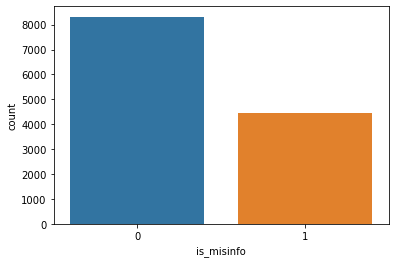

In [47]:
import seaborn as sns
ax = sns.countplot(x='is_misinfo', data=Tweet)

In [45]:
from collections import Counter
from numpy import nan
a = Counter(Tweet['is_misinfo'] == 1)
a

Counter({False: 8315, True: 4436})

In [26]:
F = Tweet[0:8315]
F
A = []
for i in range(len(F)):
    A.append(F.iloc[i,1])
A

is_misinfo                                       text content
0              0  uhg time to get my second vaccine i hope i don...
760            0  the second dose of the vaccine is no joke. i h...
771            0          Second dose of the Moderna COVID vaccine.
3585           0    Just got that good good pfizer shit @ Liverpool
774            0  If you eat at Marvel Ranch don’t worry about w...
...          ...                                                ...
1328           0  Today April   brought to you by science. Today...
1360           0  Today I am officially  weeks post-vaccine and ...
1330           0  #GetVaccinated \n\n  Yeah!!  \n\nI just got my...
1335           0  What's happening in #Karnataka? Is there #vacc...
1486           0  finished my covid vaccine training just need t...

[8315 rows x 2 columns]

['uhg time to get my second vaccine i hope i don’t DIE.. like i don’t want to sit in bed alone and feel like complete ass all day uhg',
 'the second dose of the vaccine is no joke. i have an extremely sore arm, a horrible headache, and body aches. i sle…',
 'Second dose of the Moderna COVID vaccine.',
 'Just got that good good pfizer shit @ Liverpool',
 'If you eat at Marvel Ranch don’t worry about what’s in the vaccine',
 'Good luck @kristine_stone   - hope you don’t have any side effects and are mild if you do experience them.  l’ve go…',
 'Join Danielle and get your COVID vaccine today. \nCOVID vaccine walk-ins welcome at Newton Clinic. \nCheck out our we…',
 'Got the Pfizer vaccine for me and my parents this morning! Barely took an hour, lots of driving between tents as vo…',
 'Got my first dose of the COVID vaccine! It was painless. So full of hope for the future. When you have a chance to…',
 'Alhamdulillah I got vaccine dose  appointment',
 'Schedule your #COVID vaccination here

In [27]:
T = Tweet[8315:12751]
T
B = []
for i in range(len(T)):
    B.append(T.iloc[i,1])
B

is_misinfo                                       text content
5917           1  Bill Maher, Who Is Fully Vaccinated, ‘Feels Fi...
4463           1  Euro : Christian Eriksen 'sends greetings to t...
4462           1  Agenda  is underway. It means global genocide ...
5898           1  Raising concern over the safety of an untested...
4451           1  Esai Morales pushes false claim that COVID- va...
...          ...                                                ...
1981           1  "COVID is a Chinese bioweapon designed to dest...
1448           1  Yes because a free beer is sure to make people...
1257           1  All you IDIOTS who keep spewing “the covid vac...
1259           1           SO YOUR SAYING ITS IN DEADLY VACCINE TO.
2483           1  vaccine as bioweapon?\n\n'.. Interview with Dr...

[4436 rows x 2 columns]

['Bill Maher, Who Is Fully Vaccinated, ‘Feels Fine’ After Contracting COVID- - News Flash! Vaccine is “a therapeuti…',
 "Euro : Christian Eriksen 'sends greetings to teammates' from hospital following collapse during match…",
 'Agenda  is underway. It means global genocide via “vaccine”(% depopulation plan), global communism and one reli…',
 'Raising concern over the safety of an untested vaccine is unacceptable for Sanghi guniea pigs\nScumbags just volunte…',
 "Esai Morales pushes false claim that COVID- vaccine is 'DNA modifying experimental therapy''. When someone challe…",
 'The same type of health authorities who recommend a novel experimental gene therapy disguised as a vaccine to milli…',
 'Le vamos a poner la vacuna AstraZeneca, inmediatamente yo\n  Stick your poison vaccine up your arse  ',
 "Virginia woman recounts 'massive brain bleed' from COVID vaccine, as Fauci tells hesitant folks 'Get over it' \n\nShe…",
 'COVID Vaccine Adverse Reactions Are  Times Higher Than the Flu S

(-0.5, 2999.5, 1999.5, -0.5)

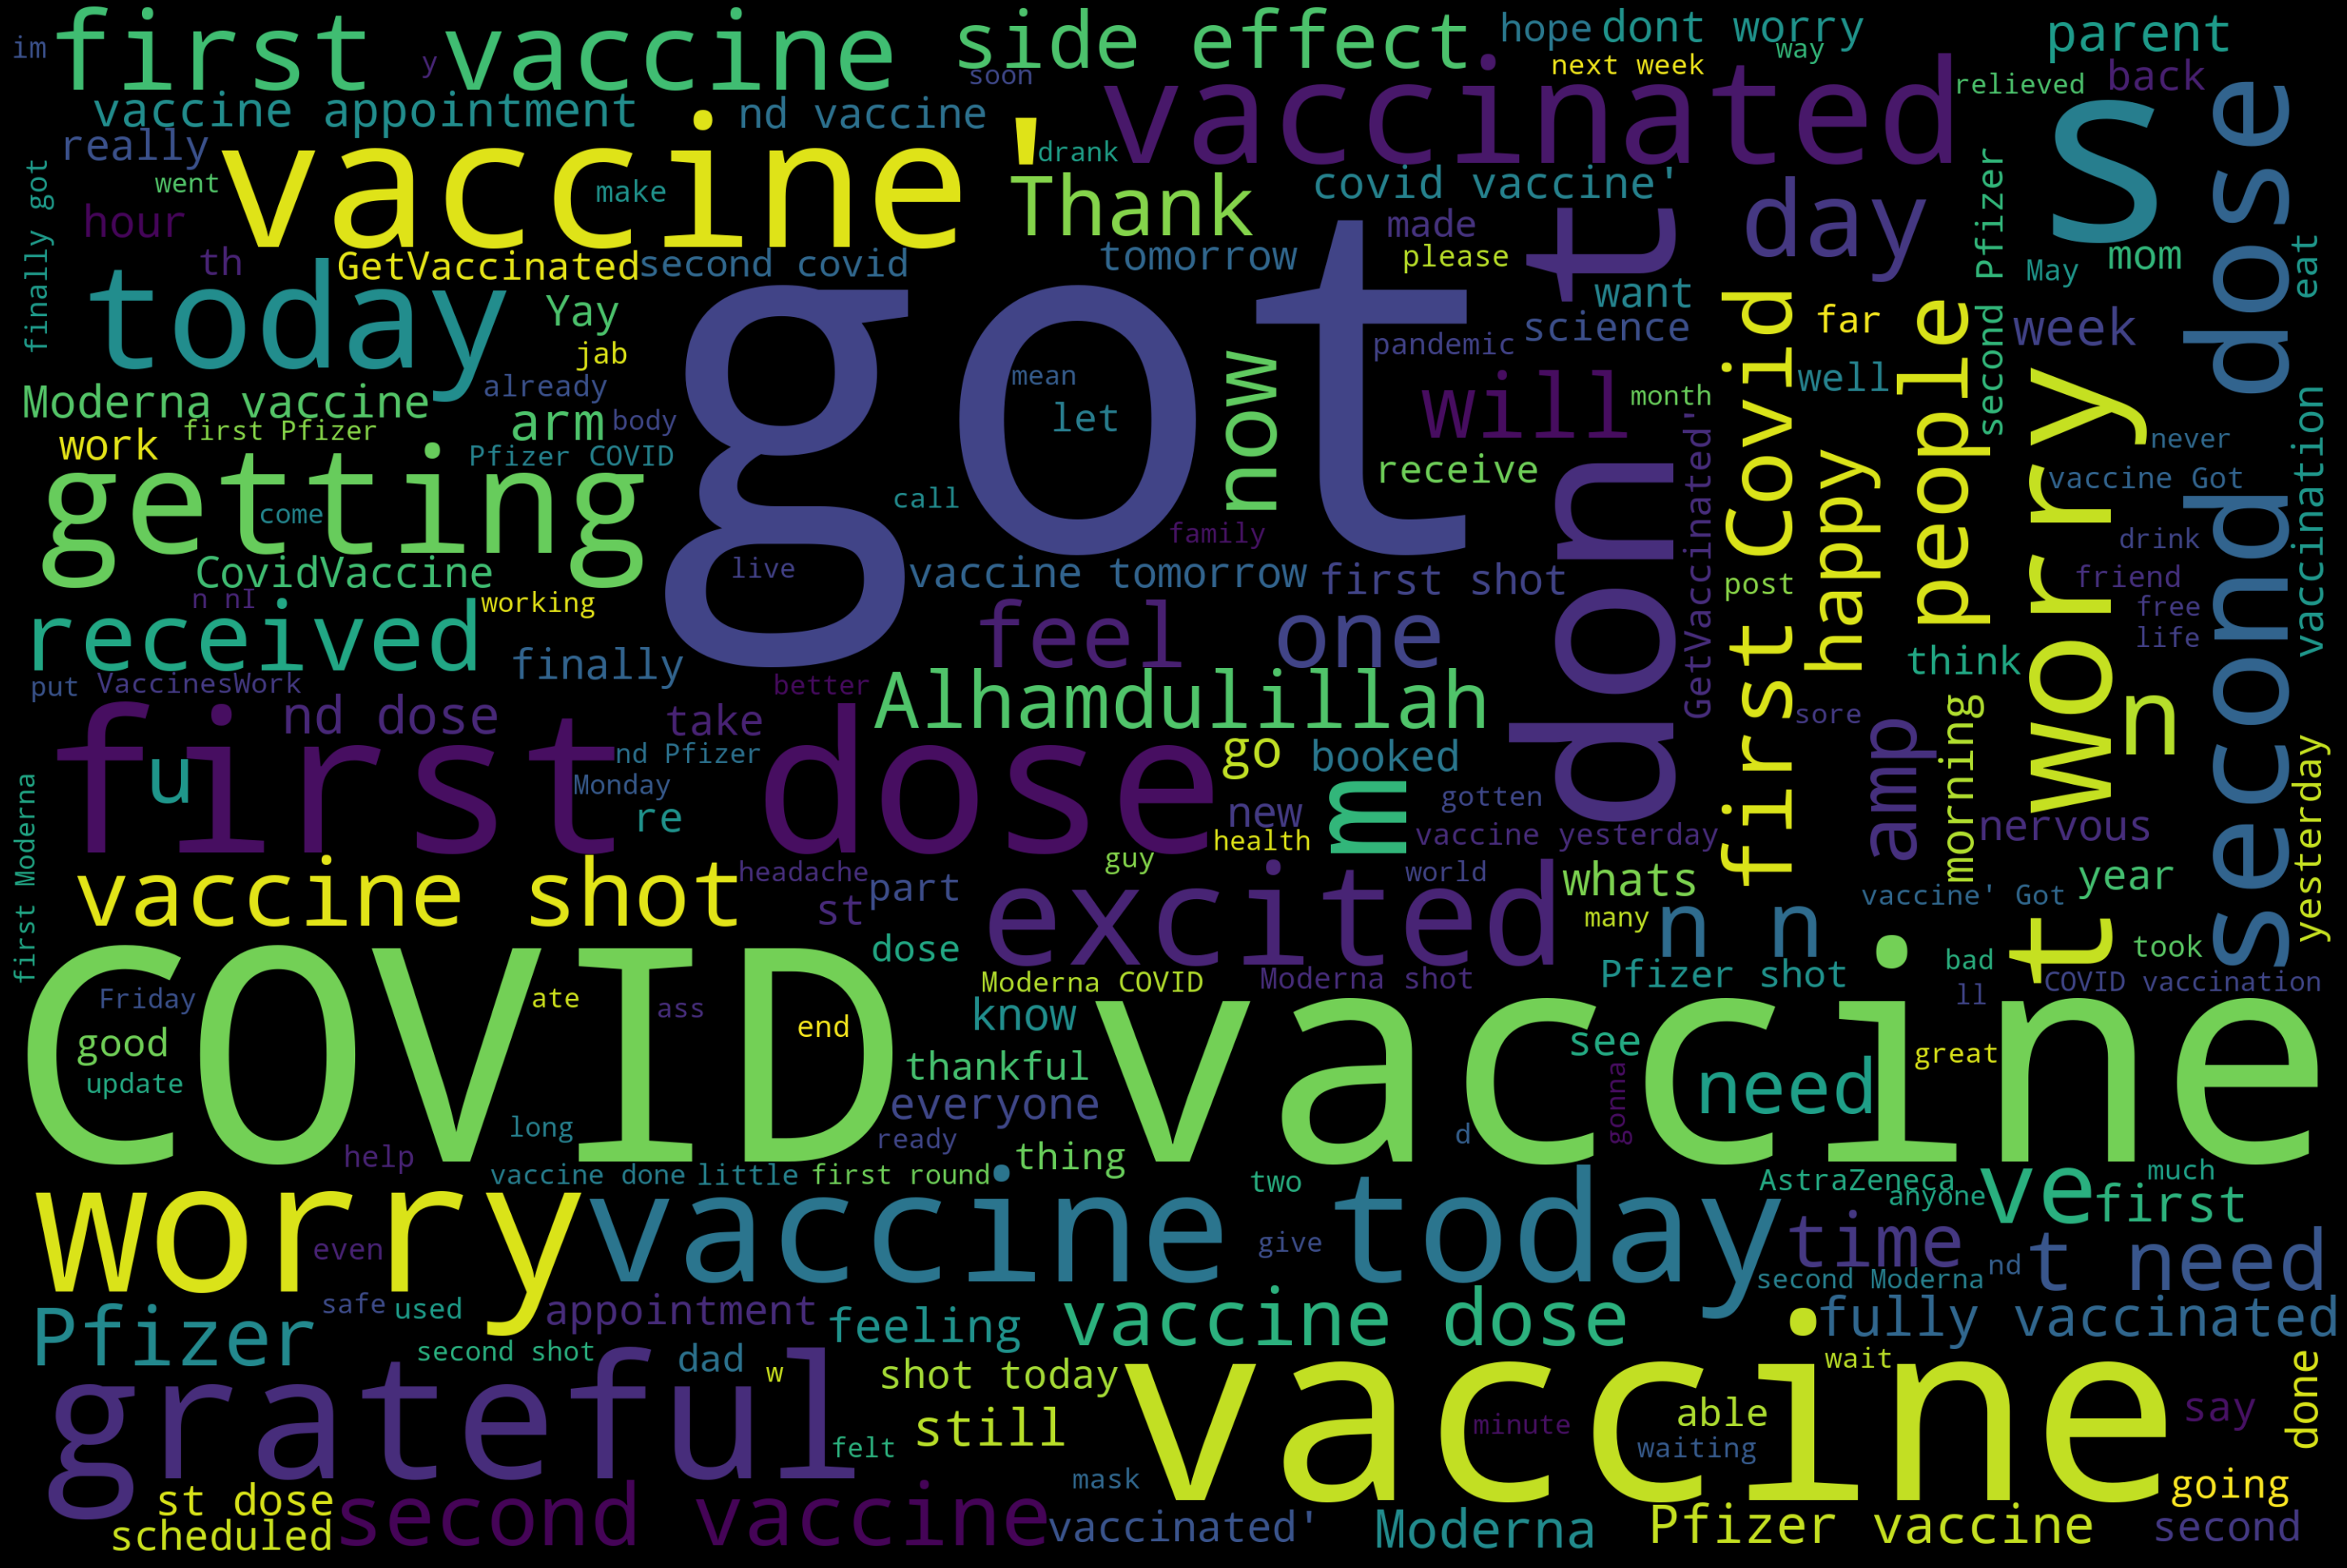

In [28]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(A))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

(-0.5, 2999.5, 1999.5, -0.5)

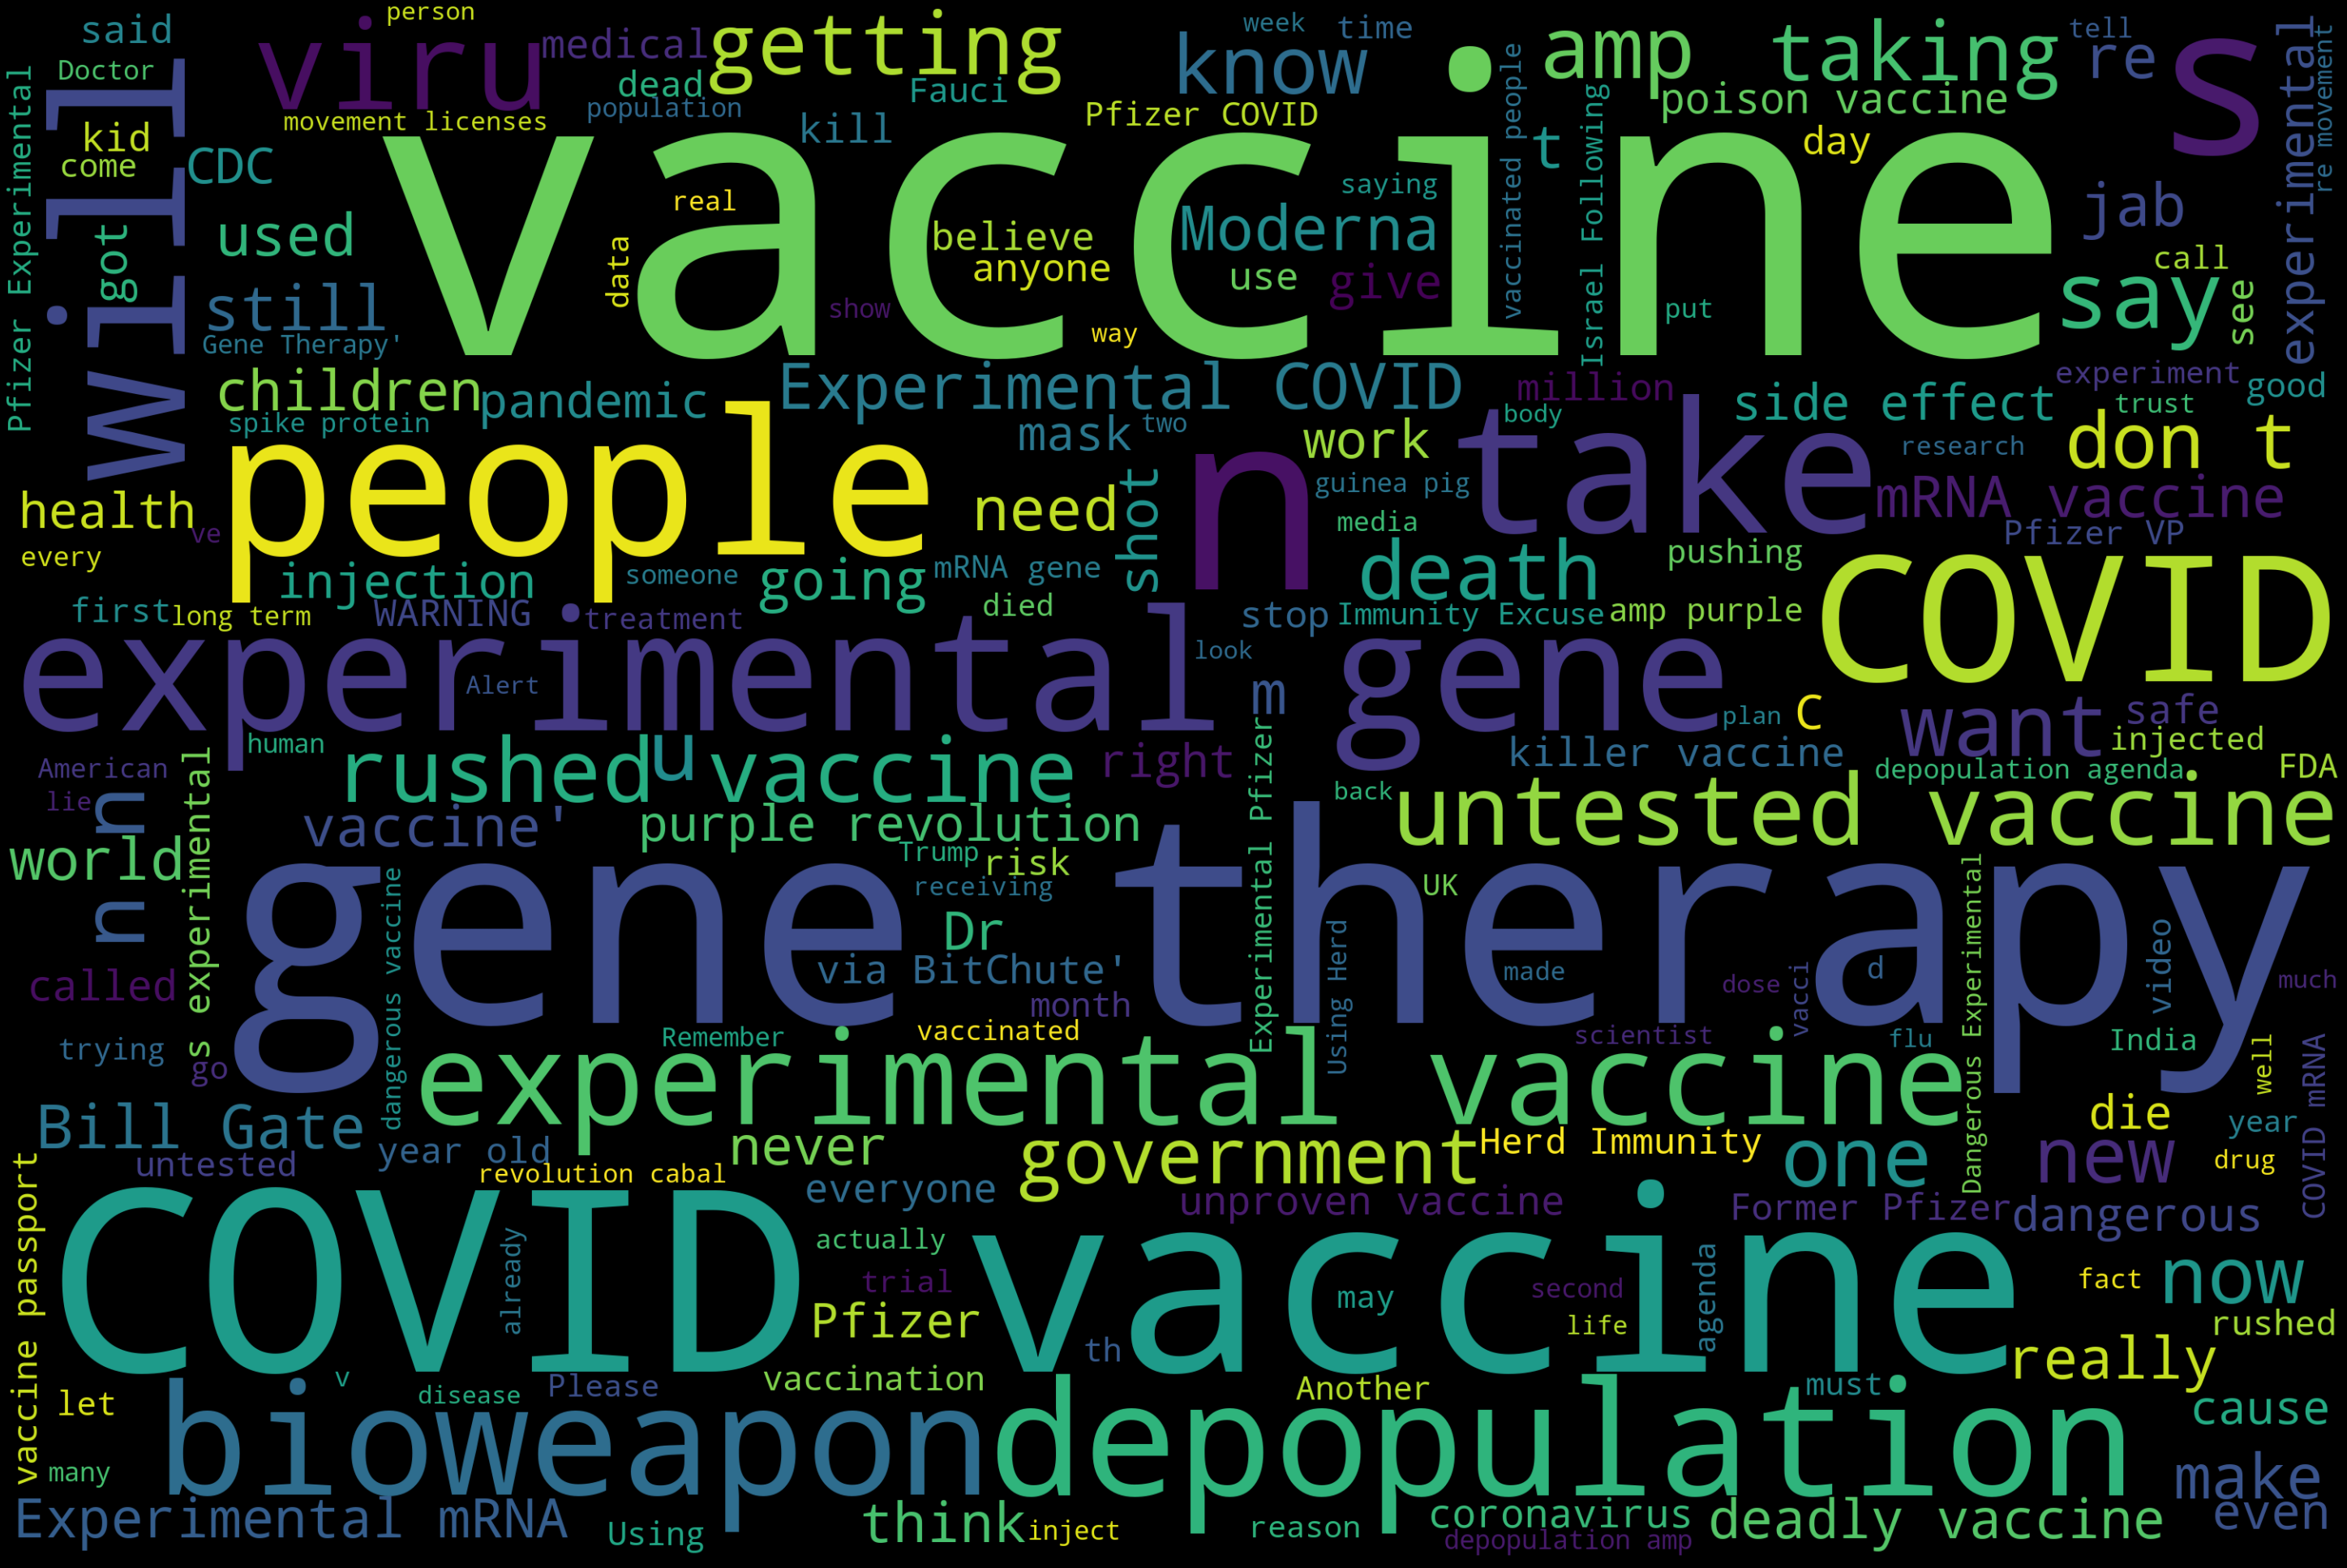

In [29]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(B))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [30]:
dataset = pd.read_csv("C:/Users/Kelvin/Desktop/Assignment/2022Spring/BIA660/Misinfodata_Twitter.csv")
dataset

Date                                               Text
0      2022/3/24 19:02  Those blood pressure medications have had deca...
1      2022/3/24 19:02  Kettering Health doctor works to build trust t...
2      2022/3/24 19:02  NOW is the time to get boosted. Household memb...
3      2022/3/24 19:02  Watch Dudu Sher-Arami, Director of Public Heal...
4      2022/3/24 19:02  In partnership with the Cayuga County Health D...
...                ...                                                ...
57761  2022/3/16 14:20  WTO DG Okonjo-Iweala Welcomes Breakthrough On ...
57762  2022/3/16 14:20  Here's why you might need a fourth COVID #vacc...
57763  2022/3/16 14:20  Theres a vaccine clinic open today for kids ag...
57764  2022/3/16 14:19  Global powers inch closer to agreement to waiv...
57765  2022/3/16 14:19  "As virus data grows, the J.&amp;J. vaccine ho...

[57766 rows x 2 columns]

In [31]:
C = []
for i in range(len(dataset)):
    C.append(dataset.iloc[i,1])
C

["Those blood pressure medications have had decades of studys.  Wait for the Covid vaccine recalls I '",
 "Kettering Health doctor works to build trust to close rural COVID vaccine gap '",
 "NOW is the time to get boosted. Household members of COVID- positive cases do not have to isolate if they are + '",
 "Watch Dudu Sher-Arami, Director of Public Health, Enfield Council talk about why its important for pregnant women '",
 "In partnership with the Cayuga County Health Department, we will be holding a walk-in COVID- vaccine clinic on Th '",
 "#NEW: To Counter COVID Amid Crises, Peacebuilding Steps Are Vital: Boosting low vaccination rates in fragile states '",
 "The moment they allowed covid positive health care staff back to work, that is when it became clear as '",
 'Judicial Watch Investigator Supported \'COVID Research\' of Anti-vaccine Former Trump Official, Leaks Reveal "',
 "The no-cost COVID- vaccine is safe, effective, and lifesaving. Learn more and schedule your vaccines or b

(-0.5, 2999.5, 1999.5, -0.5)

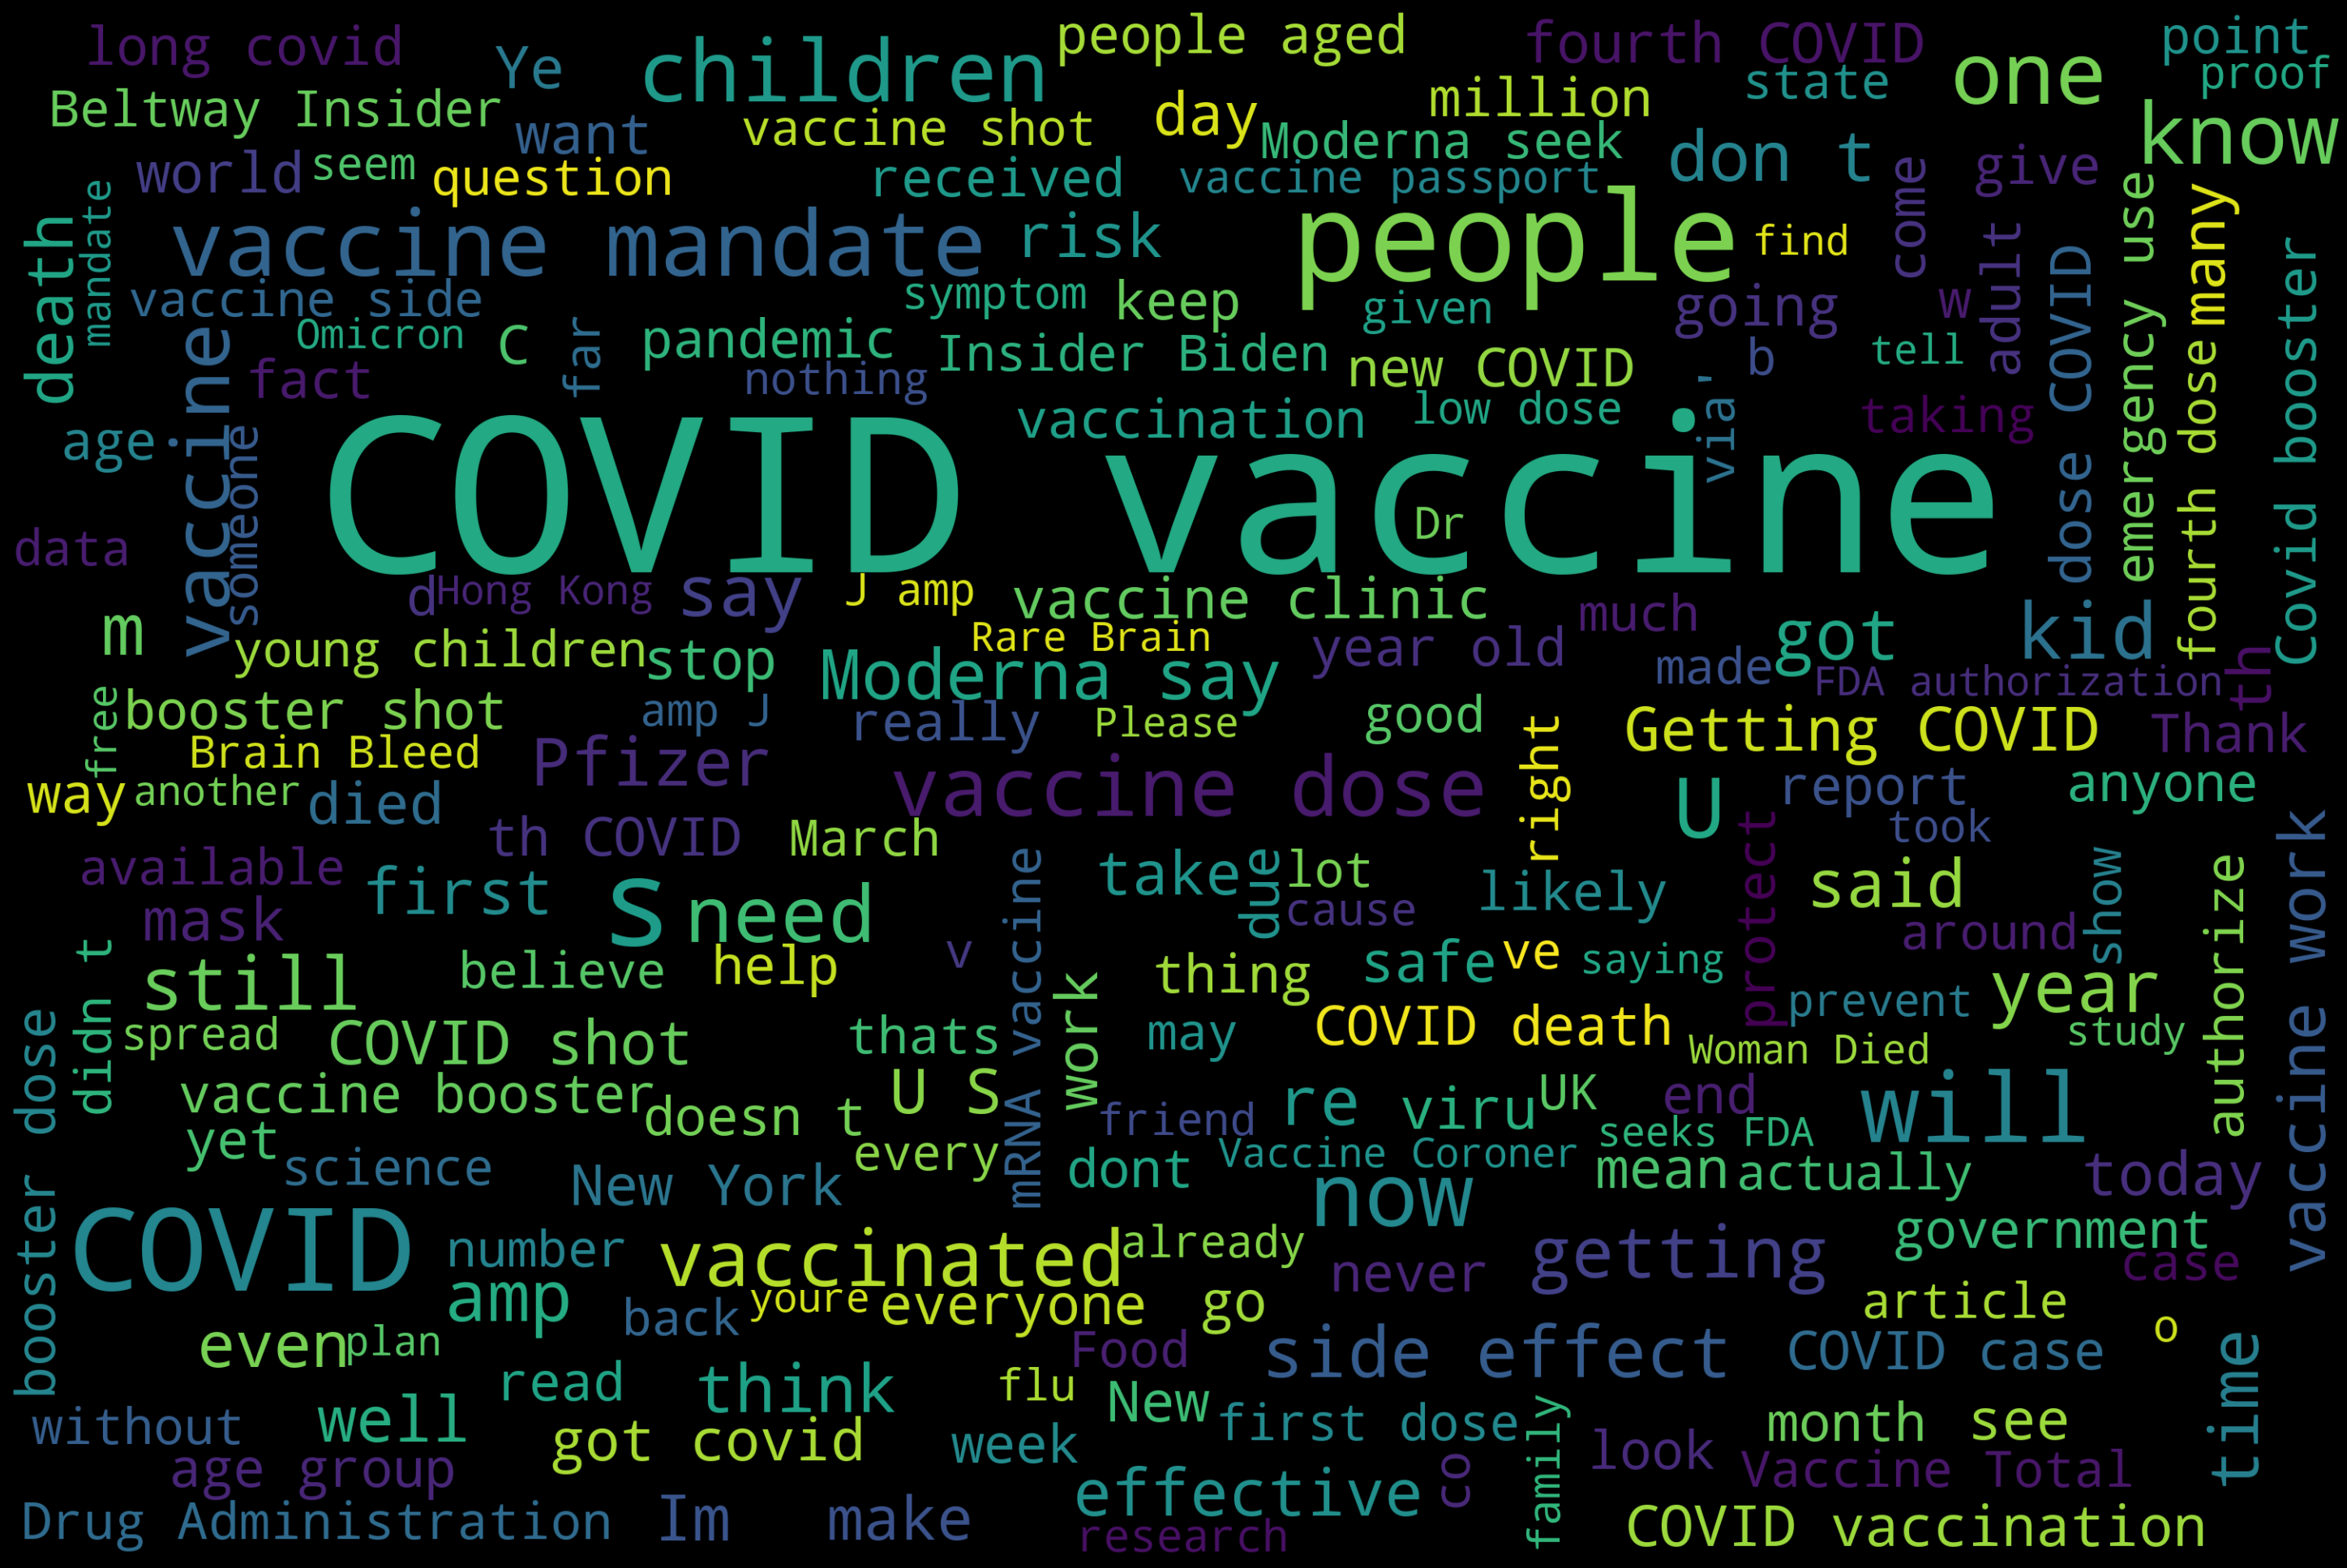

In [32]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(C))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()